# Importando Bibliotecas

In [3]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas e ferramentas de processamento do SKLEARN

from sklearn import metrics  # Métricas adicionais para avaliação de modelos
from sklearn.model_selection import train_test_split, KFold  # Funções para dividir dados em conjuntos de treino e teste, e para validação cruzada
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de avaliação de modelos de classificação
from sklearn.preprocessing import StandardScaler  # Ferramenta para pré-processamento de dados (escalonamento)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score  # Métricas de avaliação de modelos de classificação


# Técnicas de apredizado de máquina

from sklearn.linear_model import LinearRegression  # Implementação de regressão linear
from sklearn.naive_bayes import GaussianNB  # Implementação do algoritmo Naive Bayes Gaussiano
from sklearn import tree  # Implementação de árvores de decisão
from sklearn.ensemble import RandomForestClassifier  # Implementação de classificador de floresta aleatória
from sklearn.svm import SVC  # Implementação do algoritmo SVM (Support Vector Machine)
from sklearn.neighbors import KNeighborsClassifier # Implementação do algoritmo KNN
from sklearn.linear_model import LogisticRegression
# Bivlioteca TensorFlow

from tensorflow.keras.models import Sequential  # Modelo de rede neural sequencial do Keras
from tensorflow.keras.layers import *  # Camadas de uma rede neural no Keras
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback para salvar o modelo durante o treinamento
from tensorflow.keras.losses import MeanSquaredError  # Função de perda para regressão no Keras
from tensorflow.keras.metrics import RootMeanSquaredError  # Métrica adicional para avaliação de modelos de regressão
from tensorflow.keras.optimizers import Adam  # Otimizador Adam para treinamento de redes neurais no Keras


In [4]:
# Importando Base de Dados Fridge
modbus = pd.read_csv('/content/Train_Test_IoT_Modbus.csv')

In [5]:
# Definindo método de normalização de variáveis Max_Min
def max_min(x):
  return (x- x.min())/(x.max() - x.min())

In [6]:
# mapeando as variáveis nominais para as numéricas
mapeamento = {'normal':0, 'backdoor':1, 'injection':2, 'password':3, 'xss':4, 'scanning': 5}

# Pré-processamento

Visão geral do Banco de dados

In [7]:
modbus.head()

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection


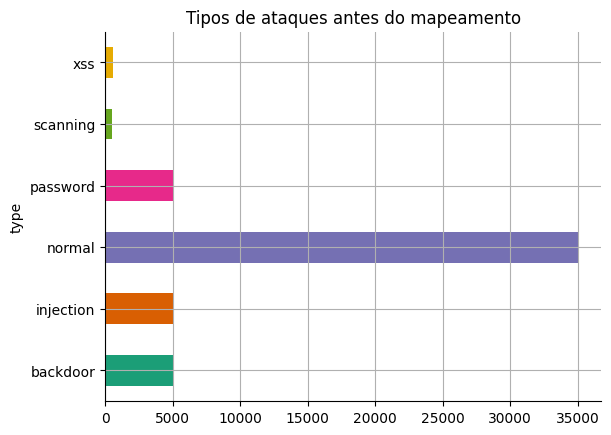

In [8]:
modbus.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Tipos de ataques antes do mapeamento")
plt.grid()

In [9]:
modbus = modbus.replace(mapeamento)# mapeia as variáveis nominais

Normatizando o banco de dados

In [10]:
modbus['FC1_Read_Input_Register'] = modbus['FC1_Read_Input_Register'].transform(max_min)
modbus['FC2_Read_Discrete_Value'] = modbus['FC2_Read_Discrete_Value'].transform(max_min)
modbus['FC3_Read_Holding_Register'] = modbus['FC3_Read_Holding_Register'].transform(max_min)
modbus['FC4_Read_Coil'] = modbus['FC4_Read_Coil'].transform(max_min)

In [11]:
modbus['ts'] = modbus['ts'].transform(max_min)

In [12]:
# colunas = [0]*len(modbus['ts'])
# for i in range (len(modbus['ts'])):
#      colunas[i] = i
# modbus['coluns'] = colunas

In [13]:
# modbus['coluns'] = modbus['coluns'].transform(max_min)

In [14]:
modbus.head()

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,0.887750,25-Apr-19,09:14:00,0.753720,0.807523,0.393285,0.207907,1,2
1,0.887750,25-Apr-19,09:14:00,0.753720,0.807523,0.393285,0.207907,1,2
2,0.887751,25-Apr-19,09:14:01,0.753720,0.807523,0.393285,0.207907,1,2
3,0.887751,25-Apr-19,09:14:02,0.753720,0.807523,0.393285,0.207907,1,2
4,0.887752,25-Apr-19,09:14:04,0.620584,0.682811,0.321984,0.539735,1,2


Definindo treinamento e teste

In [15]:
# Atributos
atributos = modbus[['ts', 'FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil']]
classe = modbus['type']

In [16]:
# Visualizando Atributos
atributos.head()

,ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
0,0.887750,0.753720,0.807523,0.393285,0.207907
1,0.887750,0.753720,0.807523,0.393285,0.207907
2,0.887751,0.753720,0.807523,0.393285,0.207907
3,0.887751,0.753720,0.807523,0.393285,0.207907
4,0.887752,0.620584,0.682811,0.321984,0.539735


In [17]:
# Separando dados de Treino e Teste em proporção 80% 20%, com random_state = 42
X_train, X_test, y_train, y_test = train_test_split(atributos, classe, test_size=0.2, random_state=42)

# 1º técnica - Arvore de decisão

In [18]:
#definindo um classificador Arvore de decisão
clf_AV = tree.DecisionTreeClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_AV, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_AV = clf_AV.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


In [19]:
#Predição e Acurácia de Teste
predicao_1 = clf_AV.predict(X_test)
acuracia_1 = accuracy_score(y_test, predicao_1)
print('Acurácia da classificação: {}' . format(round(acuracia_1,4)))

Acurácia da classificação: 1.0


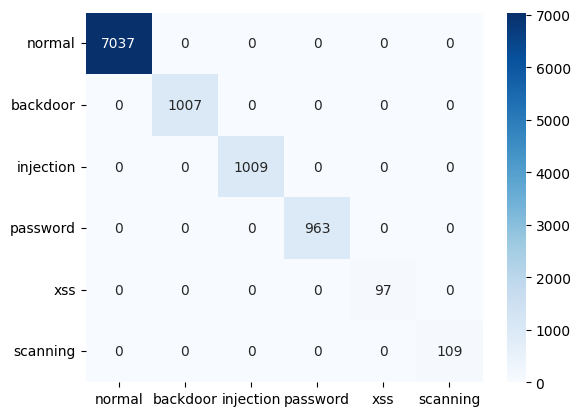

In [20]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_1), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [21]:
print(classification_report(y_test, predicao_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      1007
           2       1.00      1.00      1.00      1009
           3       1.00      1.00      1.00       963
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       109

    accuracy                           1.00     10222
   macro avg       1.00      1.00      1.00     10222
weighted avg       1.00      1.00      1.00     10222



# 2º técnica - KNN

In [22]:
#definindo um classificador KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(clf_KNN, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
clf_KNN = clf_KNN.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.895


In [23]:
#Predição e Acurácia de Teste
predicao_2 = clf_KNN.predict(X_test)
acuracia_2 = accuracy_score(y_test, predicao_2)
print('Acurácia da classificação: {}' . format(round(acuracia_2, 4)))

Acurácia da classificação: 0.9139


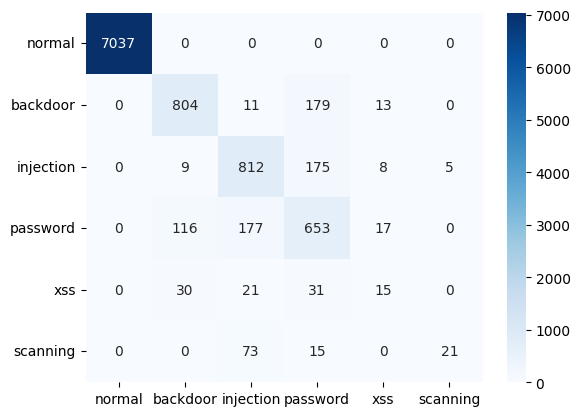

In [24]:
# Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_2), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [25]:
print(classification_report(y_test, predicao_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       0.84      0.80      0.82      1007
           2       0.74      0.80      0.77      1009
           3       0.62      0.68      0.65       963
           4       0.28      0.15      0.20        97
           5       0.81      0.19      0.31       109

    accuracy                           0.91     10222
   macro avg       0.72      0.60      0.62     10222
weighted avg       0.91      0.91      0.91     10222



# 3º técnica - SVM

In [26]:
#definindo um classificador SVM
SVM_rbf = SVC(kernel = 'rbf', gamma = 'auto', C = 1.0 )

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(SVM_rbf, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
SVM_rbf.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.978


SVC(gamma='auto')

In [27]:
#Predição e Acurácia de Teste
predicao_3 = SVM_rbf.predict(X_test)
acuracia_3 = accuracy_score(y_test, predicao_3)
print('Acurácia da classificação: {}' . format(round(acuracia_3,4)))

Acurácia da classificação: 0.9798


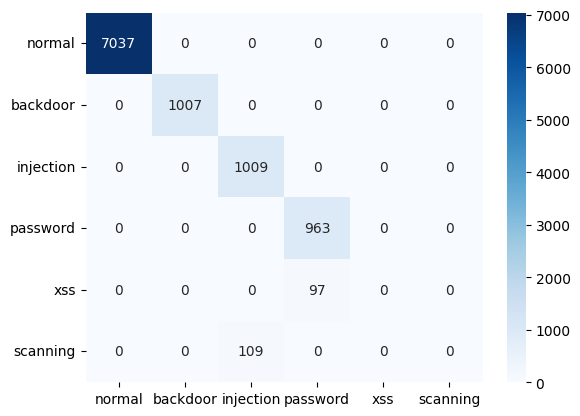

In [28]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_3), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [29]:
print(classification_report(y_test, predicao_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      1007
           2       0.90      1.00      0.95      1009
           3       0.91      1.00      0.95       963
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00       109

    accuracy                           0.98     10222
   macro avg       0.64      0.67      0.65     10222
weighted avg       0.96      0.98      0.97     10222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4º Regressão Logistica

In [30]:
#definindo um classificador Arvore de decisão
LR = LogisticRegression(solver='lbfgs', max_iter=1000)

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(LR, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
LR = LR.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 0.978


In [31]:
#Predição e Acurácia de Teste
predicao_40 = LR.predict(X_test)
acuracia_40 = accuracy_score(y_test, predicao_40)
print('Acurácia da classificação: {}' . format(round(acuracia_40,4)))

Acurácia da classificação: 0.9798


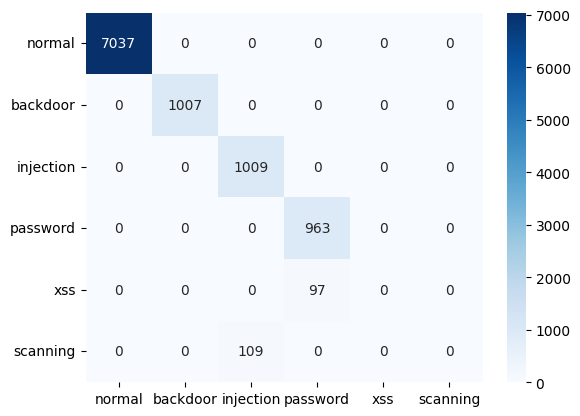

In [32]:
# Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_40), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [33]:
print(classification_report(y_test, predicao_40))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      1007
           2       0.90      1.00      0.95      1009
           3       0.91      1.00      0.95       963
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00       109

    accuracy                           0.98     10222
   macro avg       0.64      0.67      0.65     10222
weighted avg       0.96      0.98      0.97     10222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5º Técnica - Regressão linear

In [34]:
#Definindo um classificador de regreção linear
reg = LinearRegression().fit(X_train, y_train)

In [35]:
# Predição e criação de variável auxiliar
predicao_4 = reg.predict(X_test)
aux = np.zeros(len(X_test))

# Aproximando a predição para o inteiro mais próximo e armazenando na variável auxiliar
for i in range(len(X_test)):
    aux[i] = round(predicao_4[i], 0)

# Acurácia de Teste
acuracia_4 = accuracy_score(y_test, aux[:].astype(int))
print('Acurácia da classificação: {}'.format(round(acuracia_4, 3)))


Acurácia da classificação: 0.787


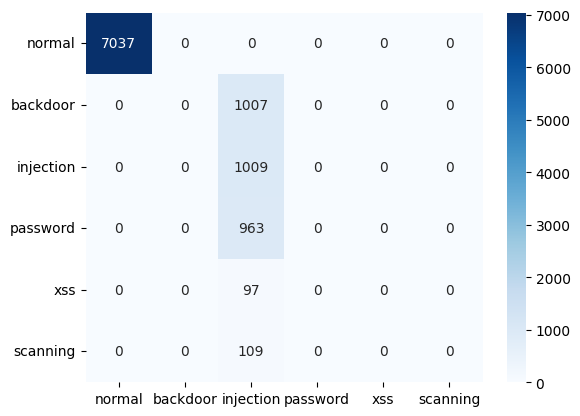

In [36]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, aux), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [37]:
print(classification_report(y_test, aux))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       0.00      0.00      0.00      1007
           2       0.32      1.00      0.48      1009
           3       0.00      0.00      0.00       963
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00       109

    accuracy                           0.79     10222
   macro avg       0.22      0.33      0.25     10222
weighted avg       0.72      0.79      0.74     10222



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6º Técnica - Naïve Bayes (NB)

In [38]:
#definindo um classificador NB
NB = GaussianNB()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
NB.fit(X_train, y_train)

Acurácia média durante a validação cruzada: 1.0


GaussianNB()

In [39]:
#Predição e Acurácia de Teste
predicao_5 = NB.predict(X_test)
acuracia_5 = accuracy_score(y_test, predicao_5)
print('Acurácia da classificação: {}' . format(round(acuracia_5,4)))

Acurácia da classificação: 1.0


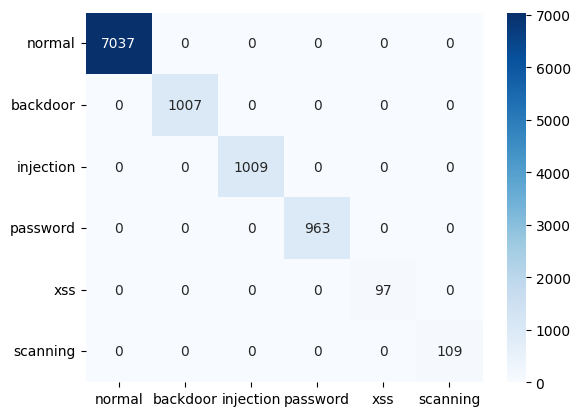

In [40]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_5), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [41]:
print(classification_report(y_test, predicao_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      1007
           2       1.00      1.00      1.00      1009
           3       1.00      1.00      1.00       963
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       109

    accuracy                           1.00     10222
   macro avg       1.00      1.00      1.00     10222
weighted avg       1.00      1.00      1.00     10222



# 7º Técnica - Random Forest

In [42]:
#definindo um classificador NB
RF = RandomForestClassifier()

#Validação cruzada usando KFold com 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#Acurácia média durante a validação cruzada
acuracias_cruzadas = cross_val_score(NB, X_train, y_train, cv=kf, scoring='accuracy')
print('Acurácia média durante a validação cruzada: {}'.format(round(acuracias_cruzadas.mean(), 4)))

#Modelo com dados de treinamento
RF.fit(X_train,y_train)

Acurácia média durante a validação cruzada: 1.0


RandomForestClassifier()

In [43]:
#Predição e Acurácia de Teste
predicao_6 = RF.predict(X_test)
acuracia_6 = accuracy_score(y_test, predicao_6)
print('Acurácia da classificação: {}' . format(round(acuracia_6,4)))

Acurácia da classificação: 1.0


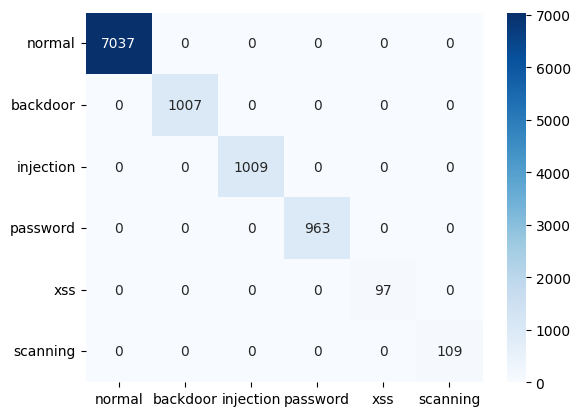

In [44]:
#Matriz de confusão
class_labels = ['normal', 'backdoor', 'injection', 'password', 'xss', 'scanning']

sns.heatmap(confusion_matrix(y_test, predicao_6), annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

In [45]:
print(classification_report(y_test, predicao_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      1007
           2       1.00      1.00      1.00      1009
           3       1.00      1.00      1.00       963
           4       1.00      1.00      1.00        97
           5       1.00      1.00      1.00       109

    accuracy                           1.00     10222
   macro avg       1.00      1.00      1.00     10222
weighted avg       1.00      1.00      1.00     10222



## LSTM

In [46]:
atributos

,ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil
0,0.887750,0.753720,0.807523,0.393285,0.207907
1,0.887750,0.753720,0.807523,0.393285,0.207907
2,0.887751,0.753720,0.807523,0.393285,0.207907
3,0.887751,0.753720,0.807523,0.393285,0.207907
4,0.887752,0.620584,0.682811,0.321984,0.539735
...,...,...,...,...,...
51101,0.050641,0.955362,0.019120,0.194918,0.447386
51102,0.050642,0.955362,0.019120,0.194918,0.447386
51103,0.050643,0.003022,0.583902,0.513529,0.680471
51104,0.050643,0.003022,0.583902,0.513529,0.680471


In [47]:
# Definindo um modelador de dados para a entrada da rede LSTM
def df_to_X_y2(df, window_size = 5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)- window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [48]:
# Modelando os dados com janela tamanho 5
WINDOW_SIZE = 5
X1, y1 = df_to_X_y2(atributos, WINDOW_SIZE)

In [49]:
X1.shape


(51101, 5, 5)

In [50]:
labels_2 = classe[5:]

In [51]:
labels_2.shape

(51101,)

In [52]:
# Dividindo dados de treino e teste na proporção 80% e 20%
X_train, X_test, y_train, y_test = train_test_split(X1, labels_2, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(40880, 5, 5)

In [54]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(5,5)))  # Adicione input_shape para representar timesteps e features
model1.add(LSTM(64))
model1.add(Dense(128, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(100, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(8, activation='sigmoid'))

model1.build(input_shape=(None, 1, 2))

In [55]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [56]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(learning_rate=0.0001), metrics = ['sparse_categorical_accuracy'])

In [57]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, callbacks=[cp1])

Epoch 1/40
1278/1278 [==============================] - 15s 10ms/step - loss: 0.5377 - sparse_categorical_accuracy: 0.7885 - val_loss: 0.3660 - val_sparse_categorical_accuracy: 0.8545
Epoch 2/40
1278/1278 [==============================] - 13s 10ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.9133 - val_loss: 0.1159 - val_sparse_categorical_accuracy: 0.9775
Epoch 3/40
1278/1278 [==============================] - 12s 9ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0495 - val_sparse_categorical_accuracy: 0.9879
Epoch 4/40
1278/1278 [==============================] - 13s 10ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.0315 - val_sparse_categorical_accuracy: 0.9921
Epoch 5/40
1278/1278 [==============================] - 14s 11ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0302 - val_sparse_categorical_accuracy: 0.9975
Epoch 6/40
1278/1278 [==============================] - 26s 21ms/step - loss: 0.0

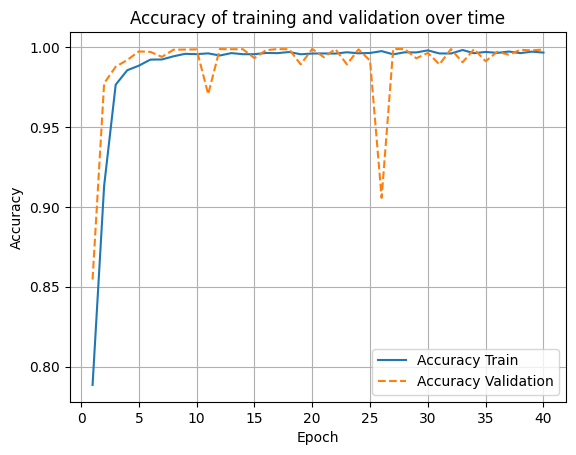

In [58]:
# Obtendo a acurácia do histórico
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']

# Obtendo as épocas
epochs = range(1, len(accuracy) + 1)

# Plotando a acurácia
plt.plot(epochs, accuracy, '-', label='Accuracy Train')
plt.plot(epochs, val_accuracy, '--', label='Accuracy Validation')
plt.title('Accuracy of training and validation over time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [59]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

320/320 [==============================] - 1s 3ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9986


In [60]:
# Obtém as previsões do modelo para os dados de teste
y_pred = model1.predict(X_test)

# Converte as previsões para rótulos binários (0 ou 1) para cada classe individualmente
y_pred_binary = np.argmax(y_pred, axis=1)

# Calcula o recall para cada classe individualmente
recall_per_class = recall_score(y_test, y_pred_binary, average=None)

# Calcula a precisão para cada classe individualmente
precision_per_class = precision_score(y_test, y_pred_binary, average=None)

# Calcula o F-score para cada classe individualmente
f_score_per_class = f1_score(y_test, y_pred_binary, average=None)

# Calcula a média ponderada dos recalls
weighted_recall = recall_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada da precisão
weighted_precision = precision_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada do F-score
weighted_f_score = f1_score(y_test, y_pred_binary, average='weighted')

# Imprime a Accuracy
print("Accuracy: {:.4f}".format(test_accuracy))

# Imprime a média ponderada da precisão
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Imprime a média ponderada do F-score
print("Weighted F-score: {:.4f}".format(weighted_f_score))

# Imprime a média ponderada dos recalls
print("Weighted Recall: {:.4f}".format(weighted_recall))

320/320 [==============================] - 1s 2ms/step
Accuracy: 0.9986
Weighted Precision: 0.9986
Weighted F-score: 0.9986
Weighted Recall: 0.9986
